# 1. House price comparison = IRL, UK & PL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


### IRL - csv

In [2]:
# loading the house data set - Ireland
import csv

In [3]:
# specifing the path to a CSV file
csv_file = 'C:\\ESTERA\\CA2\\data sets - IRL\\house_price_IRL.csv'

# opening the file
with open(csv_file, mode='r') as file:
    # create a CSV reader object
    csv_reader = csv.reader(file)

    # reading  data into a list of lists
    data = [row for row in csv_reader]

# creating a DataFrame from the data
df_house_irl = pd.DataFrame(data[1:], columns=data[0])

# https://www.geeksforgeeks.org/reading-csv-files-in-python/

In [4]:
# checking how data looks
df_house_irl.head()

,Year,Banks and Building Societies (?),Local Authorities (?),Banks and Building Societies (?),Local Authorities (?)
0,1999,"147,303","91,657","192,587","113,819"
1,2000,"166,648","112,791","219,460","126,195"
2,2001,"181,934","122,163","254,556","134,535"
3,2002,"195,801","127,215","259,939","168,771"
4,2003,"221,602","135,615","304,696","158,345"


In [5]:
# selecting only first and second columns
df_house_irl = df_house_irl.iloc[:, [0, 1]].copy()
df_house_irl

,Year,Banks and Building Societies (?)
0,1999,"147,303"
1,2000,"166,648"
2,2001,"181,934"
3,2002,"195,801"
4,2003,"221,602"
5,2004,"245,468"
6,2005,"272,679"
7,2006,"298,342"
8,2007,"321,379"
9,2008,"305,148"


In [6]:
# renaming columns
df_house_irl.columns = ['Year', 'Price_IRL']

In [7]:
# checking columns type
df_house_irl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       17 non-null     object
 1   Price_IRL  17 non-null     object
dtypes: object(2)
memory usage: 400.0+ bytes


In [8]:
# changing columns types to int
df_house_irl['Year'] = df_house_irl['Year'].astype(int)
df_house_irl['Price_IRL'] =df_house_irl['Price_IRL'].astype(int)

ValueError: invalid literal for int() with base 10: '147,303'

In [9]:
# fixing " , " error
df_house_irl['Price_IRL'] = df_house_irl['Price_IRL'].str.replace(',', '').astype(int)
df_house_irl['Price_IRL'] =df_house_irl['Price_IRL'].astype(int)

In [10]:
df_house_irl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       17 non-null     int32
 1   Price_IRL  17 non-null     int32
dtypes: int32(2)
memory usage: 264.0 bytes


In [11]:
df_house_irl.describe()

,Year,Price_IRL
count,17.000000,17.000000
mean,2007.000000,238934.470588
std,5.049752,48323.689404
min,1999.000000,147303.000000
25%,2003.000000,221602.000000
50%,2007.000000,234582.000000
75%,2011.000000,272679.000000
max,2015.000000,321379.000000


### UK - Excel

In [61]:
# reading the data, selecting specific sheet from the file
df_house_uk = pd.read_excel('C:\\ESTERA\\CA2\\data sets - UK\\House_price_UK.xls', sheet_name='Table 11')

In [62]:
df_house_uk.head(10)

,"Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,New dwellings,NaN,Other dwellings4,NaN,All dwellings,NaN,First time buyers,NaN,Former owner occupiers
2,NaN,NaN,NaN,NaN,Price,NaN,Price,NaN,Price,NaN,Price,NaN,Price
3,NaN,NaN,NaN,NaN,£,NaN,£,NaN,£,NaN,£,NaN,£
4,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1992,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Q2,NaN,77360,NaN,60210,NaN,62255,NaN,46919,NaN,76988
8,NaN,NaN,Q3,NaN,69893,NaN,62513,NaN,63712,NaN,48578,NaN,79493
9,NaN,NaN,Q4,NaN,70043,NaN,57193,NaN,59230,NaN,44831,NaN,76992


In [63]:
# removing rows until row 10
#df_house_uk = df_house_uk.iloc[10:]

In [64]:
df_house_uk = df_house_uk.iloc[10:, [1, 2, 4]]

# reseting the index
df_house_uk = df_house_uk.reset_index(drop=True)
df_house_uk.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 4
0,1993,Q1,72700
1,NaN,Q2,73289
2,NaN,Q3,73285
3,NaN,Q4,73460
4,1994,Q1,72892


In [65]:
# renaming the columns
df_house_uk.rename(columns={'Unnamed: 1': 'Year', 'Unnamed: 2': 'Quarter', 'Unnamed: 4': 'Price_UK'}, inplace=True)

In [66]:
# calculating the average value for each year
df_house_uk2 = df_house_uk.groupby('Year')['Price_UK'].mean().round(0).reset_index()

In [67]:
df_house_uk2.head(15)

,Year,Price_UK
0,1992,NaN
1,1993,71341.0
2,1994,72139.0
3,1995,73540.0
4,1996,78455.0
5,1997,94016.0
6,1998,91943.0
7,1999,104629.0
8,2000,117945.0
9,2001,131474.0


In [68]:
df_house_uk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      35 non-null     object 
 1   Price_UK  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


In [69]:
df_house_uk2['Year']

0                                                  1992
1                                                  1993
2                                                  1994
3                                                  1995
4                                                  1996
5                                                  1997
6                                                  1998
7                                                  1999
8                                                  2000
9                                                  2001
10                                                 2002
11                                                 2003
12                                                 2004
13                                                 2005
14                                                 2006
15                                                 2007
16                                                 2008
17                                              

In [70]:
# selecting only rows with years, leaving the text from the bottom
df_house_uk2 = df_house_uk2.iloc[:31, :]

In [71]:
df_house_uk2['Year'] =df_house_uk2['Year'].astype(int)

In [72]:
df_house_uk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      31 non-null     int32  
 1   Price_UK  30 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 500.0 bytes


### PL - json file

In [73]:
# loading the library
import json

In [115]:
# loading the house data set - PL
with open('C:\\ESTERA\\CA2\\data sets - PL\\Houses.json', encoding='utf-8-sig') as file:
    data = json.load(file)

In [116]:
# checking how data looks like
data

[{'id': 1,
  'Country': 'Poland',
  'City': 'Żurowa',
  'Price': 264802,
  'Floor': 2,
  'Rooms': 3,
  'Toilets': 3,
  'Parking': '0',
  'WFloor': '1',
  'Furnished': '1',
  'Pet': '0',
  'Balcony': '0',
  'Built': 2008},
 {'id': 2,
  'Country': 'Poland',
  'City': 'Tarnowiec',
  'Price': 271350,
  'Floor': 1,
  'Rooms': 2,
  'Toilets': 1,
  'Parking': '0',
  'WFloor': '0',
  'Furnished': '0',
  'Pet': '0',
  'Balcony': '0',
  'Built': 2019},
 {'id': 3,
  'Country': 'Poland',
  'City': 'Janowice',
  'Price': 269565,
  'Floor': 3,
  'Rooms': 3,
  'Toilets': 3,
  'Parking': '1',
  'WFloor': '0',
  'Furnished': '0',
  'Pet': '0',
  'Balcony': '1',
  'Built': 2001},
 {'id': 4,
  'Country': 'Poland',
  'City': 'Kamionka',
  'Price': 267952,
  'Floor': 5,
  'Rooms': 1,
  'Toilets': 2,
  'Parking': '1',
  'WFloor': '0',
  'Furnished': '1',
  'Pet': '0',
  'Balcony': '1',
  'Built': 2000},
 {'id': 5,
  'Country': 'Poland',
  'City': 'Gąbin',
  'Price': 258747,
  'Floor': 7,
  'Rooms': 2,
  'To

In [117]:
# changing data into dataFrame
df_pl = pd.DataFrame(data)

In [118]:
# checking how data looks like
df_pl.head()

,id,Country,City,Price,Floor,Rooms,Toilets,Parking,WFloor,Furnished,Pet,Balcony,Built
0,1,Poland,Żurowa,264802,2,3,3,0,1,1,0,0,2008
1,2,Poland,Tarnowiec,271350,1,2,1,0,0,0,0,0,2019
2,3,Poland,Janowice,269565,3,3,3,1,0,0,0,1,2001
3,4,Poland,Kamionka,267952,5,1,2,1,0,1,0,1,2000
4,5,Poland,Gąbin,258747,7,2,3,0,1,1,1,0,2018


In [119]:
# checking columns types
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   int64 
 1   Country    1000 non-null   object
 2   City       1000 non-null   object
 3   Price      1000 non-null   int64 
 4   Floor      1000 non-null   int64 
 5   Rooms      1000 non-null   int64 
 6   Toilets    1000 non-null   int64 
 7   Parking    1000 non-null   object
 8   WFloor     1000 non-null   object
 9   Furnished  1000 non-null   object
 10  Pet        1000 non-null   object
 11  Balcony    1000 non-null   object
 12  Built      1000 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 101.7+ KB


In [120]:
# calculate the average house price by year and round to int
average_price_pl = df_pl.groupby('Built')['Price'].mean().round().reset_index()


In [121]:
# renaming the columns
average_price_pl.columns = ['Year', 'Price_PL']

In [122]:
# checking last entries of the data
average_price_pl.tail()

,Year,Price_PL
42,2017,261155.0
43,2018,260598.0
44,2019,263320.0
45,2020,262163.0
46,2021,264307.0


### Merging data sets into one

In [140]:
# merging the dataframes on the 'Year' column
merged_df_Year = pd.merge(df_house_irl, df_house_uk2, on='Year', how='inner')
merged_df_Year = pd.merge(merged_df_Year, average_price_pl, on='Year', how='inner')
merged_df_Year

,Year,Price_IRL,Price_UK,Price_PL
0,1999,147303,104629.0,71448.0
1,2000,166648,117945.0,262881.0
2,2001,181934,131474.0,264529.0
3,2002,195801,144866.0,261127.0
4,2003,221602,166687.0,261247.0
5,2004,245468,199857.0,261001.0
6,2005,272679,209249.0,260875.0
7,2006,298342,217246.0,261490.0
8,2007,321379,217507.0,263414.0
9,2008,305148,223263.0,264316.0


In [124]:
# checking the data
merged_df_Year.describe()

,Year,Price_IRL,Price_UK,Price_PL
count,17.000000,17.000000,17.000000,17.000000
mean,2007.000000,238934.470588,192130.352941,250956.588235
std,5.049752,48323.689404,43806.470547,46283.543377
min,1999.000000,147303.000000,104629.000000,71448.000000
25%,2003.000000,221602.000000,166687.000000,261127.000000
50%,2007.000000,234582.000000,203688.000000,261306.000000
75%,2011.000000,272679.000000,218251.000000,262881.000000
max,2015.000000,321379.000000,254746.000000,265263.000000


In [125]:
merged_df_Year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       17 non-null     int32  
 1   Price_IRL  17 non-null     int32  
 2   Price_UK   17 non-null     float64
 3   Price_PL   17 non-null     float64
dtypes: float64(2), int32(2)
memory usage: 544.0 bytes


In [85]:
# changing columns types to int
#merged_df_Year['Year'] = merged_df_Year['Year'].astype(int)

# 2. Do house price differ between IRL, UK and PL ?

Null hypothesis (H0): There is not difference in house price across the three countries.</p>
Alternative hypothesis (HA): At least one country house prices differs among the countries.

## 2.1.Checking if columns have a normal distribution

In [126]:
merged_df_Year2 = merged_df_Year
merged_df_Year2

,Year,Price_IRL,Price_UK,Price_PL
0,1999,147303,104629.0,71448.0
1,2000,166648,117945.0,262881.0
2,2001,181934,131474.0,264529.0
3,2002,195801,144866.0,261127.0
4,2003,221602,166687.0,261247.0
5,2004,245468,199857.0,261001.0
6,2005,272679,209249.0,260875.0
7,2006,298342,217246.0,261490.0
8,2007,321379,217507.0,263414.0
9,2008,305148,223263.0,264316.0


In [127]:
# performming a Shapiro-Wilk test for each column
for column in merged_df_Year2.columns:
    stat, p_value = stats.shapiro(merged_df_Year[column])
    print(f'{column}: Shapiro-Wilk test statistic = {stat}, p-value = {p_value}')

Year: Shapiro-Wilk test statistic = 0.9620586633682251, p-value = 0.6704449653625488
Price_IRL: Shapiro-Wilk test statistic = 0.9724770784378052, p-value = 0.8602193593978882
Price_UK: Shapiro-Wilk test statistic = 0.9068422913551331, p-value = 0.08849158138036728
Price_PL: Shapiro-Wilk test statistic = 0.29075247049331665, p-value = 3.3686994527215575e-08


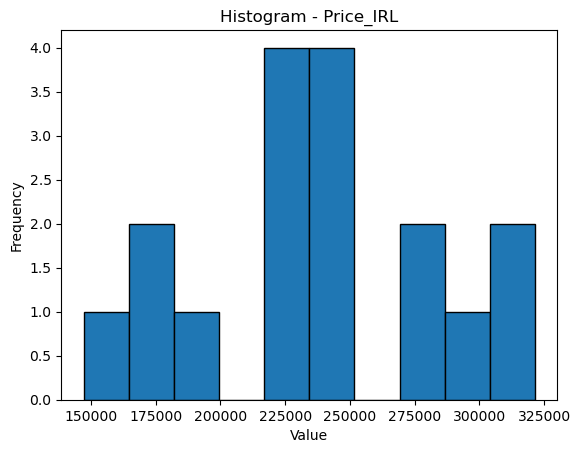

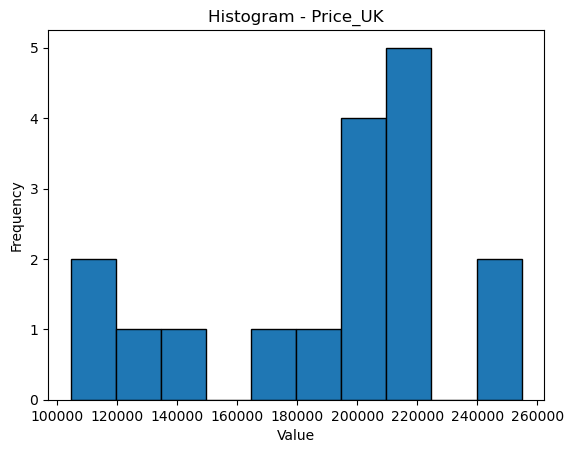

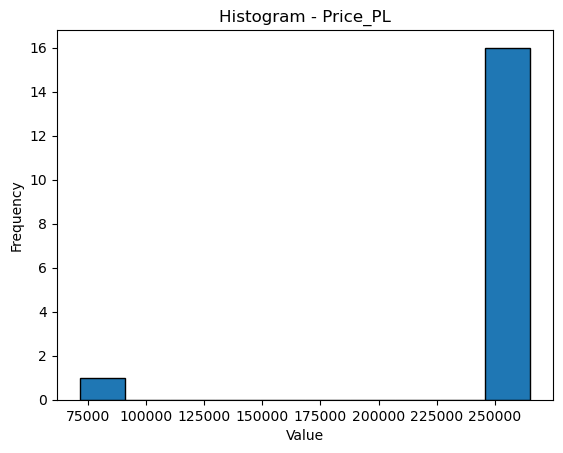

In [128]:
# producing histogram for each of price column
data = merged_df_Year2[['Price_IRL','Price_UK','Price_PL']]

for column in data:
    plt.figure()
    plt.hist(merged_df_Year[column], bins=10, edgecolor='black')
    plt.title(f'Histogram - {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## 2.2. Kruskal Wallis test

In [129]:
from scipy.stats import kruskal

Group0 = merged_df_Year2['Price_IRL']
Group1 = merged_df_Year2['Price_UK']
Group2 = merged_df_Year2['Price_PL']


grouped_data = [Group0, Group1, Group2]

In [130]:
statistic, p_value = kruskal(*grouped_data)

In [131]:
# significance level
alpha = 0.05 

if p_value < alpha:
    print("The Kruskal-Wallis test indicates significant differences between the groups.")
else:
    print("The Kruskal-Wallis test does not indicate significant differences between the groups.")

The Kruskal-Wallis test indicates significant differences between the groups.


## 2.3. Non parametric test - Dunn's test

In [132]:
from scikit_posthocs import posthoc_dunn

# Perform Dunn's test for pairwise comparisons
results = posthoc_dunn([group1, group2, group3])

# Print pairwise comparison results
for i in range(len(results)):
    for j in range(i+1, len(results)):
        group1_index = i
        group2_index = j
        p_value = results.iloc[i, j]
        if p_value < alpha:
            print(f"Group {group1_index} and Group {group2_index} are significantly different.")
        else:
            print(f"There is no significant difference between Group {group1_index} and Group {group2_index}.")


Group 0 and Group 1 are significantly different.
There is no significant difference between Group 0 and Group 2.
Group 1 and Group 2 are significantly different.


In [139]:
merged_df_Year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1999 to 2015
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price_IRL  17 non-null     int32  
 1   Price_UK   17 non-null     float64
 2   Price_PL   17 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 476.0 bytes


# 3. ARIMA -Time series analysis

In [135]:
from statsmodels.tsa.arima.model import ARIMA

In [141]:
# Select the target variable for prediction (e.g., 'Price_IRL')

target_data = merged_df_Year['Price_IRL']

# Create and fit the ARIMA model
model = ARIMA(target_data, order=(1, 0, 0))  # Example order (p, d, q)
model_fit = model.fit()

In [191]:
# Forecast prices for the next time steps
forecast = model_fit.forecast(steps=10) 
forecast_price = round(forecast)

# Print the forecasted values
#print("Forecasted Prices:" + str(forecast_price))

In [192]:
# Create a DataFrame to store the results
result_df = pd.DataFrame({'Year': range(2016, 2026), 'ARIMA_Predictions': forecast_price})

# Print the DataFrame
print(result_df)

    Year  ARIMA_Predictions
17  2016           280028.0
18  2017           276585.0
19  2018           273430.0
20  2019           270540.0
21  2020           267892.0
22  2021           265466.0
23  2022           263243.0
24  2023           261206.0
25  2024           259340.0
26  2025           257630.0


# 4. Dashboard 

### 4.1. Loading population data set


In [169]:
pop = pd.read_excel('C:\\ESTERA\\CA2\\data sets - IRL\\Population.xls')

In [170]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0


In [171]:
# selecting rows with populations for Ireland, UK and Poland
countries = ['Ireland', 'Poland', 'United Kingdom']

# Selecting columns for years from 199 to 2015
start_year = 1999
end_year = 2015

# filtering rows based on 'Country Name'
filtered_df = pop[pop['Country Name'].isin(countries)]

# filtering columns based on years
filtered_df = filtered_df[['Country Name'] + [str(year) for year in range(start_year, end_year + 1)]]

In [172]:
filtered_df

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
81,United Kingdom,58682466.0,58892514.0,59119673.0,59370479.0,59647577.0,59987905.0,60401206.0,60846820.0,61322463.0,61806995.0,62276270.0,62766365.0,63258810.0,63700215.0,64128273.0,64602298.0,65116219.0
111,Ireland,3754786.0,3805174.0,3866243.0,3931947.0,3996521.0,4070262.0,4159914.0,4273591.0,4398942.0,4489544.0,4535375.0,4560155.0,4580084.0,4599533.0,4623816.0,4657740.0,4701957.0
190,Poland,38660271.0,38258629.0,38248076.0,38230364.0,38204570.0,38182222.0,38165445.0,38141267.0,38120560.0,38125759.0,38151603.0,38042794.0,38063255.0,38063164.0,38040196.0,38011735.0,37986412.0


In [173]:
# melting df
df_transformed = filtered_df.melt(id_vars='Country Name', var_name='Year', value_name='Population')

# pivoting df
df_transformed = df_transformed.pivot(index='Year', columns='Country Name', values='Population').reset_index()

# renaming columns
df_transformed.columns = ['Year', 'population_irl', 'population_uk', 'population_pl']

In [174]:
df_transformed

,Year,population_irl,population_uk,population_pl
0,1999,3754786.0,38660271.0,58682466.0
1,2000,3805174.0,38258629.0,58892514.0
2,2001,3866243.0,38248076.0,59119673.0
3,2002,3931947.0,38230364.0,59370479.0
4,2003,3996521.0,38204570.0,59647577.0
5,2004,4070262.0,38182222.0,59987905.0
6,2005,4159914.0,38165445.0,60401206.0
7,2006,4273591.0,38141267.0,60846820.0
8,2007,4398942.0,38120560.0,61322463.0
9,2008,4489544.0,38125759.0,61806995.0


In [175]:
# calculating the percentage difference on yearly basis
df_transformed['population_irl_diff'] = df_transformed['population_irl'].pct_change() * 100
df_transformed['population_uk_diff'] = df_transformed['population_uk'].pct_change() * 100
df_transformed['population_pl_diff'] = df_transformed['population_pl'].pct_change() * 100

In [176]:
df_transformed

,Year,population_irl,population_uk,population_pl,population_irl_diff,population_uk_diff,population_pl_diff
0,1999,3754786.0,38660271.0,58682466.0,NaN,NaN,NaN
1,2000,3805174.0,38258629.0,58892514.0,1.341967,-1.038901,0.357940
2,2001,3866243.0,38248076.0,59119673.0,1.604894,-0.027583,0.385718
3,2002,3931947.0,38230364.0,59370479.0,1.699428,-0.046308,0.424234
4,2003,3996521.0,38204570.0,59647577.0,1.642291,-0.067470,0.466727
5,2004,4070262.0,38182222.0,59987905.0,1.845130,-0.058496,0.570565
6,2005,4159914.0,38165445.0,60401206.0,2.202610,-0.043939,0.688974
7,2006,4273591.0,38141267.0,60846820.0,2.732677,-0.063350,0.737757
8,2007,4398942.0,38120560.0,61322463.0,2.933154,-0.054290,0.781706
9,2008,4489544.0,38125759.0,61806995.0,2.059632,0.013638,0.790138


### 4.2. Loading the construction price index data sets

### a) IRL

In [220]:
csv_file_irl = 'C:\\ESTERA\\CA2\\data sets - IRL\\national_house_construction_cost_index_0.csv'

# opening the file
with open(csv_file_irl, mode='r') as file:
    # create a CSV reader object
    csv_reader = csv.reader(file)

    # reading  data into a list of lists
    data = [row for row in csv_reader]

# creating a DataFrame from the data
index_irl = pd.DataFrame(data[1:], columns=data[0])

In [221]:
index_irl

,,NATIONAL HOUSE CONSTRUCTION COST INDEX,,,,,,,,,...,,,,,,,,,,
0,Base: January 1991 = 100,,,,,,,,,,...,,,,,,,,,,
1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
3,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
4,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,
5,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,
6,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,
7,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,
8,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,
9,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,


In [222]:
index_irl.columns = index_irl.iloc[0]
index_irl = index_irl[1:]

In [223]:
# Read the CSV file
df = pd.read_csv('C:\\ESTERA\\CA2\\data sets - IRL\\national_house_construction_cost_index_0.csv', skiprows=1)

# Use the wrapped first row as column names
df.columns = df.iloc[0]

# Remove the wrapped first row
df = df[1:]

In [224]:
df

,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
1,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
2,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
3,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
4,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
5,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
6,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
7,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
8,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN
9,September,112.2,115.7,116.9,121.5,126,134.1,137.7,166,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,NaN
10,October,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202,203.8,205.4,206.7,207.2,NaN


In [225]:
index_irl = df[df['Month'] == 'Yearly average']

In [226]:
index_irl

,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
13,Yearly average,111,114.7,116.3,120.4,124.9,131,141,161.5,171.8,...,201.7,209.4,206.5,208.7,203.1,203.5,204.7,206,207.1,NaN


In [227]:
melted_df = index_irl.melt(id_vars='Month', var_name='Year', value_name='Index_IRL')
index_irl = melted_df[melted_df['Month'] == 'Yearly average'].drop('Month', axis=1)

In [228]:
index_irl.head()

,Year,Index_IRL
0,1994,111
1,1995,114.7
2,1996,116.3
3,1997,120.4
4,1998,124.9


In [229]:
index_irl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       23 non-null     object
 1   Index_IRL  22 non-null     object
dtypes: object(2)
memory usage: 552.0+ bytes


In [231]:
index_irl['Year'] = index_irl['Year'].astype(int)
index_irl['Index_IRL'] = index_irl['Index_IRL'].astype(float)
index_irl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       23 non-null     int32  
 1   Index_IRL  22 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 460.0 bytes


### b) UK

In [205]:
# loading data set
index_uk = pd.read_excel('C:\\ESTERA\\CA2\\data sets - UK\\Construction Price index -uk.xlsx')
index_uk.head()

,Year,Index
0,2007,76.80
1,2008,79.78
2,2009,82.30
3,2010,85.57
4,2011,88.91


In [232]:
# renaming column for better understaning
index_uk.columns = ['Year', 'Index_UK']

# checking columns type
index_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      16 non-null     int64  
 1   Index_UK  16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


### c) PL

In [202]:
# loading data set
df_pl = pd.read_excel('C:\\ESTERA\\CA2\\data sets - PL\\Construction cost index Poland.xlsx')
df_pl.head()

,Year,Quarter,Index
0,2007.0,Q1,100.0
1,NaN,Q2,99.8
2,NaN,Q3,99.8
3,NaN,Q4,99.2
4,2008.0,Q1,98.9


In [209]:
index_pl = df_pl.groupby('Year')['Index'].mean().reset_index()
index_pl.head()

,Year,Index
0,2007.0,100.0
1,2008.0,98.9
2,2009.0,99.6
3,2010.0,100.1
4,2011.0,101.5


In [233]:
# renaming the column
index_pl.columns = ['Year', 'Index_PL']

# checking columns type
index_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15 non-null     float64
 1   Index_PL  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


### 4.3. Merging the Indexes df together

In [234]:
merged_index_df = pd.merge(index_irl, index_uk, on='Year', how='inner')
merged_index_df = pd.merge(merged_index_df, index_pl, on='Year', how='inner')
merged_index_df

,Year,Index_IRL,Index_UK,Index_PL
0,2007,201.7,76.80,100.0
1,2008,209.4,79.78,98.9
2,2009,206.5,82.30,99.6
3,2010,208.7,85.57,100.1
4,2011,203.1,88.91,101.5
5,2012,203.5,91.96,105.8
6,2013,204.7,95.04,101.0
7,2014,206.0,99.24,101.0
8,2015,207.1,100.01,100.6
9,2016,NaN,103.00,99.6


In [134]:
import pandas as pd
import plotly.express as px

# melting the dataframe
df_melted =merged_df_Year2.melt(id_vars='Year', var_name='Price_Column', value_name='Price')

# Define the color map
color_map = {'Price_IRL': 'green', 'Price_UK': 'blue', 'Price_PL': 'red'}

# Create animated bar charts with custom colors
fig = px.bar(df_melted, x='Price_Column', y='Price', color='Price_Column', animation_frame='Year',
             range_y=[0, max(df_melted['Price'])], title='House prices by Year for IRL, UK & PL',
             color_discrete_map=color_map)

# setting the x-axis and y-axis labels
fig.update_xaxes(title_text='Price Columns')
fig.update_yaxes(title_text='Price')

# showing the figure
fig.show()